# This script reads CESM2 ET data downloaded from Casper in NCAR (Fig 11)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 
import matplotlib as mpl
import shapefile as shp
import cartopy.io.shapereader as shpreader
from numpy import linspace
from numpy import meshgrid
import matplotlib.colors as colors
from numpy import array, ma
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.feature as cfeature

## Basin shape files

In [2]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [3]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)


In [4]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#

In [5]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

## Lat

In [6]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/latsUsArr.npy'
lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

y_US = lats_US.shape[0]
print(y_US)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]
32


## Lon

In [7]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

x_US = lons_US.shape[0]
print(x_US)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
56


### Historical (1850-2014): 1980 months

In [8]:
file_hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/monEtUsHistEnsMean.npy'
file_hist_ensMean_loaded = np.load(file_hist_ensMean)
print(file_hist_ensMean_loaded.shape)

(1980, 32, 56)


### Scenario (2105-2100): 1032 months

In [9]:
file_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/monEtUsScenEnsMean.npy'
file_scen_ensMean_loaded = np.load(file_scen_ensMean)
print(file_scen_ensMean_loaded.shape)

(1032, 32, 56)


## The two files (Hist and Scen)

In [10]:
print(file_hist_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


## The four time slots

In [11]:

histYrSt = 1850

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [12]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [13]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1814
362


## Era 1

In [14]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr + 2  # To include Jan and Feb of the following year in 2045
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 362
362


## Era 2

In [15]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2075
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 722
362


## Era 3

In [16]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr    # Data ends at Dec, 2100
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [17]:
print(file_hist_ensMean_loaded.shape)
print(file_scen_ensMean_loaded.shape)

(1980, 32, 56)
(1032, 32, 56)


In [18]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(362, 32, 56)


In [19]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(362, 32, 56)


In [20]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(362, 32, 56)


In [21]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Seasons start here

In [22]:
print(nMonsPerYr)

12


In [23]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(362, 32, 56)
(362, 32, 56)
(362, 32, 56)
(312, 32, 56)


## MAM

## ref Period

In [24]:
mamMonSt = 3
mamMonMid = 4
mamMonEnd = 5

In [25]:

param_mamSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_refPeriod_Us_ensmean.shape)

param_mamMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_refPeriod_Us_ensmean.shape)

param_mamEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [26]:
param_mamSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamSt_refPeriod_Us_ensmean, axis = 0)
print(param_mamSt_refPeriod_Us_ensmean_timeAvg.shape)

param_mamMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamMid_refPeriod_Us_ensmean, axis = 0)
print(param_mamMid_refPeriod_Us_ensmean_timeAvg.shape)

param_mamEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_refPeriod_Us_ensmean, axis = 0)
print(param_mamEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [27]:
param_mamTot_refPeriod_Us_ensmean_timeAvg = (param_mamSt_refPeriod_Us_ensmean_timeAvg+param_mamMid_refPeriod_Us_ensmean_timeAvg+param_mamEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_mamTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [28]:

param_mamSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraOne_Us_ensmean.shape)

param_mamMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraOne_Us_ensmean.shape)

param_mamEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [29]:
param_mamSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraOne_Us_ensmean, axis = 0)
print(param_mamSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraOne_Us_ensmean, axis = 0)
print(param_mamMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [30]:
param_mamTot_scenEraOne_Us_ensmean_timeAvg = (param_mamSt_scenEraOne_Us_ensmean_timeAvg+param_mamMid_scenEraOne_Us_ensmean_timeAvg+param_mamEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [31]:

param_mamSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraTwo_Us_ensmean.shape)

param_mamMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraTwo_Us_ensmean.shape)

param_mamEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [32]:
param_mamSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [33]:
param_mamTot_scenEraTwo_Us_ensmean_timeAvg = (param_mamSt_scenEraTwo_Us_ensmean_timeAvg+param_mamMid_scenEraTwo_Us_ensmean_timeAvg+param_mamEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [34]:

param_mamSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonSt-1::nMonsPerYr]
print(param_mamSt_scenEraThree_Us_ensmean.shape)

param_mamMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonMid-1::nMonsPerYr]
print(param_mamMid_scenEraThree_Us_ensmean.shape)

param_mamEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[mamMonEnd-1::nMonsPerYr]
print(param_mamEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [35]:
param_mamSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamSt_scenEraThree_Us_ensmean, axis = 0)
print(param_mamSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamMid_scenEraThree_Us_ensmean, axis = 0)
print(param_mamMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_mamEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_mamEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_mamEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [36]:
param_mamTot_scenEraThree_Us_ensmean_timeAvg = (param_mamSt_scenEraThree_Us_ensmean_timeAvg+param_mamMid_scenEraThree_Us_ensmean_timeAvg+param_mamEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_mamTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


### Differences at the three Eras

In [37]:
param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraOne_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [38]:
param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraTwo_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [39]:
param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_mamTot_scenEraThree_Us_ensmean_timeAvg - param_mamTot_refPeriod_Us_ensmean_timeAvg)
print(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (MAM)

## Writing in an Xarray Data array

In [40]:
y_Us, x_Us = param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape
print(y_Us)
print(x_Us)

32
56


In [41]:
param_mamTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_mamTot_scenEraOne_diff_Us_xarray.shape)
print(param_mamTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.67796015,  2.92311158, ...,  1.03799035,
         4.68965748,  6.46560677],
       [ 0.33901494,  2.69603137,  2.49117218, ...,  1.56046961,
         2.72102437, -0.80858488],
       [ 2.35033254,  2.524977  ,  2.00910702, ...,  0.89630152,
         1.33796831, -1.59893774]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [42]:
param_mamTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_mamTot_scenEraTwo_diff_Us_xarray.shape)
print(param_mamTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.55130074, 6.20696404, ..., 1.90784443, 8.47271852,
        9.95102345],
       [0.98123992, 5.12369145, 6.44614797, ..., 1.44441203, 2.20655098,
        1.14298529],
       [4.57578693, 5.9580773 , 4.50736373, ..., 0.53505836, 1.03893819,
        1.06452084]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [43]:
param_mamTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_mamTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_mamTot_scenEraThree_diff_Us_xarray.shape)
print(param_mamTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  2.55297359,  8.94190127, ...,  4.99615574,
        11.84757149, 12.05706757],
       [ 1.75497583,  6.92517759, 11.25393422, ...,  5.2517145 ,
         5.49555764,  3.73707131],
       [ 6.25025213, 10.18242006,  7.85472125, ...,  2.85960941,
         3.83177147,  4.3663594 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Mask files for the Basin Domain only

### Mississippi

In [44]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [45]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [46]:
param_mamTot_scenEraOne_diff_masked_Missi = param_mamTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraOne_diff_masked_Missi.shape)
print(param_mamTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [47]:
param_mamTot_scenEraTwo_diff_masked_Missi = param_mamTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraTwo_diff_masked_Missi.shape)
print(param_mamTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [48]:
param_mamTot_scenEraThree_diff_masked_Missi = param_mamTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_mamTot_scenEraThree_diff_masked_Missi.shape)
print(param_mamTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [49]:
maxVal_mamTot_diff_masked_scenEraOne = np.nanmax(param_mamTot_scenEraOne_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraOne)
minVal_mamTot_diff_masked_scenEraOne = np.nanmin(param_mamTot_scenEraOne_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraOne)

11.701425069266406
0.5939208922795842


In [50]:
maxVal_mamTot_diff_masked_scenEraTwo = np.nanmax(param_mamTot_scenEraTwo_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraTwo)
minVal_mamTot_diff_masked_scenEraTwo = np.nanmin(param_mamTot_scenEraTwo_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraTwo)

18.74311456207611
2.3501355243756734


In [51]:
maxVal_mamTot_diff_masked_scenEraThree = np.nanmax(param_mamTot_scenEraThree_diff_masked_Missi)
print(maxVal_mamTot_diff_masked_scenEraThree)
minVal_mamTot_diff_masked_scenEraThree = np.nanmin(param_mamTot_scenEraThree_diff_masked_Missi)
print(minVal_mamTot_diff_masked_scenEraThree)

25.257792628379228
2.1016264714730397


## Plotting

In [52]:

latUsMin = lats_US.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_US.max()
print(latUsMax)

lonUsMin = lons_US.min()
print(lonUsMin)

lonUsMax = lons_US.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [53]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [54]:
x_Us = linspace(lonUsMin, lonUsMax, x_US)
y_Us = linspace(latUsMin, latUsMax, y_US)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [55]:
vmin_mamTot_scenEraOne = np.floor(minVal_mamTot_diff_masked_scenEraOne)
vmax_mamTot_scenEraOne = np.ceil(maxVal_mamTot_diff_masked_scenEraOne)
print(vmin_mamTot_scenEraOne)
print(vmax_mamTot_scenEraOne)

0.0
12.0


In [56]:
vmin_mamTot_scenEraTwo = np.floor(minVal_mamTot_diff_masked_scenEraTwo)
vmax_mamTot_scenEraTwo = np.ceil(maxVal_mamTot_diff_masked_scenEraTwo)
print(vmin_mamTot_scenEraTwo)
print(vmax_mamTot_scenEraTwo)

2.0
19.0


In [57]:
vmin_mamTot_scenEraThree = np.floor(minVal_mamTot_diff_masked_scenEraThree)
vmax_mamTot_scenEraThree = np.ceil(maxVal_mamTot_diff_masked_scenEraThree)
print(vmin_mamTot_scenEraThree)
print(vmax_mamTot_scenEraThree)

2.0
26.0


In [58]:
nDiv_mamTot_scenEraOne = int(vmax_mamTot_scenEraOne - vmin_mamTot_scenEraOne + 1)
print(nDiv_mamTot_scenEraOne)

13


In [59]:
nDiv_mamTot_scenEraTwo = int(vmax_mamTot_scenEraTwo - vmin_mamTot_scenEraTwo + 1)
print(nDiv_mamTot_scenEraTwo)

18


In [60]:

nDiv_mamTot_scenEraThree = int(vmax_mamTot_scenEraThree - vmin_mamTot_scenEraThree + 1)
print(nDiv_mamTot_scenEraThree)


25


## JJA

## ref Period

In [61]:
jjaMonSt = 6
jjaMonMid = 7
jjaMonEnd = 8

In [62]:

param_jjaSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_refPeriod_Us_ensmean.shape)

param_jjaMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_refPeriod_Us_ensmean.shape)

param_jjaEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [63]:
param_jjaSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_refPeriod_Us_ensmean, axis = 0)
print(param_jjaSt_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_refPeriod_Us_ensmean, axis = 0)
print(param_jjaMid_refPeriod_Us_ensmean_timeAvg.shape)

param_jjaEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_refPeriod_Us_ensmean, axis = 0)
print(param_jjaEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [64]:
param_jjaTot_refPeriod_Us_ensmean_timeAvg = (param_jjaSt_refPeriod_Us_ensmean_timeAvg+param_jjaMid_refPeriod_Us_ensmean_timeAvg+param_jjaEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_jjaTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [65]:

param_jjaSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraOne_Us_ensmean.shape)

param_jjaMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraOne_Us_ensmean.shape)

param_jjaEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [66]:
param_jjaSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [67]:
param_jjaTot_scenEraOne_Us_ensmean_timeAvg = (param_jjaSt_scenEraOne_Us_ensmean_timeAvg+param_jjaMid_scenEraOne_Us_ensmean_timeAvg+param_jjaEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [68]:

param_jjaSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraTwo_Us_ensmean.shape)

param_jjaMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraTwo_Us_ensmean.shape)

param_jjaEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [69]:
param_jjaSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [70]:
param_jjaTot_scenEraTwo_Us_ensmean_timeAvg = (param_jjaSt_scenEraTwo_Us_ensmean_timeAvg+param_jjaMid_scenEraTwo_Us_ensmean_timeAvg+param_jjaEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [71]:

param_jjaSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonSt-1::nMonsPerYr]
print(param_jjaSt_scenEraThree_Us_ensmean.shape)

param_jjaMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonMid-1::nMonsPerYr]
print(param_jjaMid_scenEraThree_Us_ensmean.shape)

param_jjaEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[jjaMonEnd-1::nMonsPerYr]
print(param_jjaEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [72]:
param_jjaSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaSt_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaMid_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_jjaEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_jjaEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_jjaEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [73]:
param_jjaTot_scenEraThree_Us_ensmean_timeAvg = (param_jjaSt_scenEraThree_Us_ensmean_timeAvg+param_jjaMid_scenEraThree_Us_ensmean_timeAvg+param_jjaEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_jjaTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [74]:
param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraOne_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [75]:
param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraTwo_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [76]:
param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_jjaTot_scenEraThree_Us_ensmean_timeAvg - param_jjaTot_refPeriod_Us_ensmean_timeAvg)
print(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (JJA)

## Writing in an Xarray Data array

In [77]:
param_jjaTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])                                                      
print(param_jjaTot_scenEraOne_diff_Us_xarray.shape)
print(param_jjaTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -2.15050928,   1.24691572, ...,  -6.8402714 ,
          5.32231362,   2.51275045],
       [ -2.94931459,  -0.19205983,   4.27622179, ...,   9.88500216,
          0.1167084 ,  -9.36678219],
       [ -0.60518168,   3.41753212,   2.59886321, ...,  11.84286319,
         11.52715548, -10.37976638]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [78]:
param_jjaTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])                                                      
print(param_jjaTot_scenEraTwo_diff_Us_xarray.shape)
print(param_jjaTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -3.7396418 ,  1.87320132, ..., -5.65153005,
        13.37696679,  6.52460876],
       [-4.80830176, -0.29910058,  7.05245227, ..., -1.30953076,
        -4.45808434, -2.48802345],
       [-0.57299644,  6.44539583,  4.28963943, ...,  9.91475378,
         4.07632977, -3.67064349]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [79]:
param_jjaTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_jjaTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])                                                      
print(param_jjaTot_scenEraThree_diff_Us_xarray.shape)
print(param_jjaTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -5.16806369,  2.15628271, ...,  2.53099931,
        24.11144392, 13.78406521],
       [-6.38852434, -0.1834158 ,  8.78801264, ...,  4.34832233,
         4.98373132,  6.36939959],
       [-0.4005732 ,  8.83993918,  5.82184975, ..., 17.04405807,
         6.0736589 ,  4.85699943]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [80]:
param_jjaTot_scenEraOne_diff_masked_Missi = param_jjaTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraOne_diff_masked_Missi.shape)
print(param_jjaTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [81]:
param_jjaTot_scenEraTwo_diff_masked_Missi = param_jjaTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraTwo_diff_masked_Missi.shape)
print(param_jjaTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [82]:
param_jjaTot_scenEraThree_diff_masked_Missi = param_jjaTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_jjaTot_scenEraThree_diff_masked_Missi.shape)
print(param_jjaTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [83]:
maxVal_jjaTot_diff_masked_scenEraOne = np.nanmax(param_jjaTot_scenEraOne_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraOne)
minVal_jjaTot_diff_masked_scenEraOne = np.nanmin(param_jjaTot_scenEraOne_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraOne)

14.556994529266376
-13.53468438447453


In [84]:
maxVal_jjaTot_diff_masked_scenEraTwo = np.nanmax(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraTwo)
minVal_jjaTot_diff_masked_scenEraTwo = np.nanmin(param_jjaTot_scenEraTwo_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraTwo)

21.973009953217115
-22.868129280017456


In [85]:
maxVal_jjaTot_diff_masked_scenEraThree = np.nanmax(param_jjaTot_scenEraThree_diff_masked_Missi)
print(maxVal_jjaTot_diff_masked_scenEraThree)
minVal_jjaTot_diff_masked_scenEraThree = np.nanmin(param_jjaTot_scenEraThree_diff_masked_Missi)
print(minVal_jjaTot_diff_masked_scenEraThree)

25.953917309993315
-33.31088071332823


In [86]:
vmin_jjaTot_scenEraThree = np.floor(minVal_jjaTot_diff_masked_scenEraThree)
vmax_jjaTot_scenEraThree = np.ceil(maxVal_jjaTot_diff_masked_scenEraThree)
print(vmin_jjaTot_scenEraThree)
print(vmax_jjaTot_scenEraThree)

-34.0
26.0


In [87]:
nDiv_jjaTot_scenEraThree = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_jjaTot_scenEraThree)

61


## SON

## ref Period

In [88]:
sonMonSt = 9
sonMonMid = 10
sonMonEnd = 11

In [89]:

param_sonSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_refPeriod_Us_ensmean.shape)

param_sonMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_refPeriod_Us_ensmean.shape)

param_sonEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [90]:
param_sonSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonSt_refPeriod_Us_ensmean, axis = 0)
print(param_sonSt_refPeriod_Us_ensmean_timeAvg.shape)

param_sonMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonMid_refPeriod_Us_ensmean, axis = 0)
print(param_sonMid_refPeriod_Us_ensmean_timeAvg.shape)

param_sonEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_refPeriod_Us_ensmean, axis = 0)
print(param_sonEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [91]:
param_sonTot_refPeriod_Us_ensmean_timeAvg = (param_sonSt_refPeriod_Us_ensmean_timeAvg+param_sonMid_refPeriod_Us_ensmean_timeAvg+param_sonEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_sonTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [92]:

param_sonSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraOne_Us_ensmean.shape)

param_sonMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraOne_Us_ensmean.shape)

param_sonEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [93]:
param_sonSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraOne_Us_ensmean, axis = 0)
print(param_sonSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraOne_Us_ensmean, axis = 0)
print(param_sonMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [94]:
param_sonTot_scenEraOne_Us_ensmean_timeAvg = (param_sonSt_scenEraOne_Us_ensmean_timeAvg+param_sonMid_scenEraOne_Us_ensmean_timeAvg+param_sonEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [95]:

param_sonSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraTwo_Us_ensmean.shape)

param_sonMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraTwo_Us_ensmean.shape)

param_sonEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [96]:
param_sonSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [97]:
param_sonTot_scenEraTwo_Us_ensmean_timeAvg = (param_sonSt_scenEraTwo_Us_ensmean_timeAvg+param_sonMid_scenEraTwo_Us_ensmean_timeAvg+param_sonEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [98]:

param_sonSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonSt-1::nMonsPerYr]
print(param_sonSt_scenEraThree_Us_ensmean.shape)

param_sonMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonMid-1::nMonsPerYr]
print(param_sonMid_scenEraThree_Us_ensmean.shape)

param_sonEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[sonMonEnd-1::nMonsPerYr]
print(param_sonEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [99]:
param_sonSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonSt_scenEraThree_Us_ensmean, axis = 0)
print(param_sonSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonMid_scenEraThree_Us_ensmean, axis = 0)
print(param_sonMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_sonEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_sonEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_sonEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [100]:
param_sonTot_scenEraThree_Us_ensmean_timeAvg = (param_sonSt_scenEraThree_Us_ensmean_timeAvg+param_sonMid_scenEraThree_Us_ensmean_timeAvg+param_sonEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_sonTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [101]:
param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraOne_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [102]:
param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraTwo_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [103]:
param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_sonTot_scenEraThree_Us_ensmean_timeAvg - param_sonTot_refPeriod_Us_ensmean_timeAvg)
print(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (SON)

## Writing in an Xarray Data array

In [104]:
param_sonTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_sonTot_scenEraOne_diff_Us_xarray.shape)
print(param_sonTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   1.81247909,   1.50360738, ...,  -7.99443586,
          2.95685909,   3.43391958],
       [  1.26651915,   1.53720309,   1.6504518 , ...,  -0.66868263,
         -3.29948591,  -8.43878503],
       [  1.33771467,   1.65887548,   1.56731024, ...,   4.49470177,
         -0.07761996, -10.35145195]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [105]:
param_sonTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_sonTot_scenEraTwo_diff_Us_xarray.shape)
print(param_sonTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   4.69331379,   3.31075588, ...,  -9.30711747,
          5.91071783,   6.0165972 ],
       [  3.61070296,   3.21417615,   3.49166918, ..., -10.37612878,
         -8.48991682,  -6.16123152],
       [  2.78257465,   3.44314271,   3.10781874, ...,  -1.59979365,
         -8.91497796,  -7.4354611 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [106]:
param_sonTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_sonTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_sonTot_scenEraThree_diff_Us_xarray.shape)
print(param_sonTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  7.72445318,  5.3910332 , ..., -6.64518657,
         9.14685356,  9.01762021],
       [ 6.07301549,  5.06387692,  5.78862972, ..., -9.32435969,
        -5.91788461, -3.73892621],
       [ 4.34571695,  5.59407989,  5.13154607, ...,  0.11081238,
        -9.21418754, -4.77266613]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [107]:
param_sonTot_scenEraOne_diff_masked_Missi = param_sonTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraOne_diff_masked_Missi.shape)
print(param_sonTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [108]:
param_sonTot_scenEraTwo_diff_masked_Missi = param_sonTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraTwo_diff_masked_Missi.shape)
print(param_sonTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [109]:
param_sonTot_scenEraThree_diff_masked_Missi = param_sonTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_sonTot_scenEraThree_diff_masked_Missi.shape)
print(param_sonTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [110]:
maxVal_sonTot_diff_masked_scenEraOne = np.nanmax(param_sonTot_scenEraOne_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraOne)
minVal_sonTot_diff_masked_scenEraOne = np.nanmin(param_sonTot_scenEraOne_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraOne)

6.579964687378379
-5.443037863486097


In [111]:
maxVal_sonTot_diff_masked_scenEraTwo = np.nanmax(param_sonTot_scenEraTwo_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraTwo)
minVal_sonTot_diff_masked_scenEraTwo = np.nanmin(param_sonTot_scenEraTwo_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraTwo)

8.797117057110881
-12.138792307960102


In [112]:
maxVal_sonTot_diff_masked_scenEraThree = np.nanmax(param_sonTot_scenEraThree_diff_masked_Missi)
print(maxVal_sonTot_diff_masked_scenEraThree)
minVal_sonTot_diff_masked_scenEraThree = np.nanmin(param_sonTot_scenEraThree_diff_masked_Missi)
print(minVal_sonTot_diff_masked_scenEraThree)

11.174694247673663
-11.247490847213506


In [113]:
vmin_sonTot_scenEraThree = np.floor(minVal_sonTot_diff_masked_scenEraThree)
vmax_sonTot_scenEraThree = np.ceil(maxVal_sonTot_diff_masked_scenEraThree)
print(vmin_sonTot_scenEraThree)
print(vmax_sonTot_scenEraThree)

-12.0
12.0


In [114]:
nDiv_sonTot_scenEraThree = int(vmax_sonTot_scenEraThree - vmin_sonTot_scenEraThree + 1)
print(nDiv_sonTot_scenEraThree)

25


## DJF

## ref Period

In [115]:
djfMonSt = 12
djfMonMid = 1
djfMonEnd = 2

In [116]:

param_djfSt_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_refPeriod_Us_ensmean.shape)

param_djfMid_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_refPeriod_Us_ensmean = param_djfMid_refPeriod_Us_ensmean[1::]
print(param_djfMid_refPeriod_Us_ensmean.shape)

param_djfEnd_refPeriod_Us_ensmean = param_refPeriod_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_refPeriod_Us_ensmean = param_djfEnd_refPeriod_Us_ensmean[1::]
print(param_djfEnd_refPeriod_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [117]:
param_djfSt_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfSt_refPeriod_Us_ensmean, axis = 0)
print(param_djfSt_refPeriod_Us_ensmean_timeAvg.shape)

param_djfMid_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfMid_refPeriod_Us_ensmean, axis = 0)
print(param_djfMid_refPeriod_Us_ensmean_timeAvg.shape)

param_djfEnd_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_refPeriod_Us_ensmean, axis = 0)
print(param_djfEnd_refPeriod_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [118]:
param_djfTot_refPeriod_Us_ensmean_timeAvg = (param_djfSt_refPeriod_Us_ensmean_timeAvg+param_djfMid_refPeriod_Us_ensmean_timeAvg+param_djfEnd_refPeriod_Us_ensmean_timeAvg)/3
print(param_djfTot_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


## Scen Era 1

In [119]:

param_djfSt_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraOne_Us_ensmean.shape)

param_djfMid_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraOne_Us_ensmean = param_djfMid_scenEraOne_Us_ensmean[1::]
print(param_djfMid_scenEraOne_Us_ensmean.shape)

param_djfEnd_scenEraOne_Us_ensmean = param_scenEraOne_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraOne_Us_ensmean = param_djfEnd_scenEraOne_Us_ensmean[1::]
print(param_djfEnd_scenEraOne_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [120]:
param_djfSt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraOne_Us_ensmean, axis = 0)
print(param_djfSt_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraOne_Us_ensmean, axis = 0)
print(param_djfMid_scenEraOne_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraOne_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [121]:
param_djfTot_scenEraOne_Us_ensmean_timeAvg = (param_djfSt_scenEraOne_Us_ensmean_timeAvg+param_djfMid_scenEraOne_Us_ensmean_timeAvg+param_djfEnd_scenEraOne_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraOne_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 2

In [122]:

param_djfSt_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraTwo_Us_ensmean.shape)

param_djfMid_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonMid-1::nMonsPerYr]
param_djfMid_scenEraTwo_Us_ensmean = param_djfMid_scenEraTwo_Us_ensmean[1::]
print(param_djfMid_scenEraTwo_Us_ensmean.shape)

param_djfEnd_scenEraTwo_Us_ensmean = param_scenEraTwo_Us_ensmean[djfMonEnd-1::nMonsPerYr]
param_djfEnd_scenEraTwo_Us_ensmean = param_djfEnd_scenEraTwo_Us_ensmean[1::]
print(param_djfEnd_scenEraTwo_Us_ensmean.shape)


(30, 32, 56)
(30, 32, 56)
(30, 32, 56)


In [123]:
param_djfSt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfSt_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfMid_scenEraTwo_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraTwo_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [124]:
param_djfTot_scenEraTwo_Us_ensmean_timeAvg = (param_djfSt_scenEraTwo_Us_ensmean_timeAvg+param_djfMid_scenEraTwo_Us_ensmean_timeAvg+param_djfEnd_scenEraTwo_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraTwo_Us_ensmean_timeAvg.shape)


(32, 56)


## Scen Era 3

In [125]:

param_djfSt_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonSt-1::nMonsPerYr]
print(param_djfSt_scenEraThree_Us_ensmean.shape)

param_djfMid_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonMid-1::nMonsPerYr]
print(param_djfMid_scenEraThree_Us_ensmean.shape)

param_djfEnd_scenEraThree_Us_ensmean = param_scenEraThree_Us_ensmean[djfMonEnd-1::nMonsPerYr]
print(param_djfEnd_scenEraThree_Us_ensmean.shape)


(26, 32, 56)
(26, 32, 56)
(26, 32, 56)


In [126]:
param_djfSt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfSt_scenEraThree_Us_ensmean, axis = 0)
print(param_djfSt_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfMid_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfMid_scenEraThree_Us_ensmean, axis = 0)
print(param_djfMid_scenEraThree_Us_ensmean_timeAvg.shape)

param_djfEnd_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_djfEnd_scenEraThree_Us_ensmean, axis = 0)
print(param_djfEnd_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


In [127]:
param_djfTot_scenEraThree_Us_ensmean_timeAvg = (param_djfSt_scenEraThree_Us_ensmean_timeAvg+param_djfMid_scenEraThree_Us_ensmean_timeAvg+param_djfEnd_scenEraThree_Us_ensmean_timeAvg)/3
print(param_djfTot_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)


## Differences at the three Eras

In [128]:
param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraOne_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [129]:
param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraTwo_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


In [130]:
param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg = (param_djfTot_scenEraThree_Us_ensmean_timeAvg - param_djfTot_refPeriod_Us_ensmean_timeAvg)
print(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg.shape)

(32, 56)


## Basin Mask (DJF)

### Writing in an Xarray Data array

In [131]:
param_djfTot_scenEraOne_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraOne_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_djfTot_scenEraOne_diff_Us_xarray.shape)
print(param_djfTot_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  2.88794721,  0.42030788, ..., -0.38296443,
         1.00332834,  1.32986754],
       [ 2.72944806,  1.05437117,  0.1900728 , ...,  0.76850854,
         0.65750962, -1.05099692],
       [ 0.9543621 ,  0.23420986,  0.40967419, ...,  0.95845456,
         0.85508441, -1.31313691]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [132]:
param_djfTot_scenEraTwo_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraTwo_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_djfTot_scenEraTwo_diff_Us_xarray.shape)
print(param_djfTot_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  6.8022877 ,  1.5519482 , ...,  0.40559619,
         2.76000254,  3.23523947],
       [ 6.32748831,  2.86324585,  0.60024357, ..., -0.14220301,
         0.41947084,  0.75956385],
       [ 2.52050689,  0.52214244,  0.83807468, ...,  0.98524318,
         0.21040166,  0.05616072]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [133]:
param_djfTot_scenEraThree_diff_Us_xarray = xr.DataArray(param_djfTot_scenEraThree_pDiff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])
print(param_djfTot_scenEraThree_diff_Us_xarray.shape)
print(param_djfTot_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 10.24077579,  3.64481834, ...,  2.18710359,
         5.00475146,  5.61985433],
       [ 9.45086408,  5.26901824,  1.542863  , ...,  0.4957982 ,
         1.98223848,  2.80918862],
       [ 4.52559151,  1.23817287,  1.46094967, ...,  2.24166859,
         0.50916076,  1.54760456]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Creating Mask files for the Basin Domain only

## Mississippi

In [134]:
param_djfTot_scenEraOne_diff_masked_Missi = param_djfTot_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraOne_diff_masked_Missi.shape)
print(param_djfTot_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [135]:
param_djfTot_scenEraTwo_diff_masked_Missi = param_djfTot_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraTwo_diff_masked_Missi.shape)
print(param_djfTot_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [136]:
param_djfTot_scenEraThree_diff_masked_Missi = param_djfTot_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_djfTot_scenEraThree_diff_masked_Missi.shape)
print(param_djfTot_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [137]:
maxVal_djfTot_diff_masked_scenEraOne = np.nanmax(param_djfTot_scenEraOne_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraOne)
minVal_djfTot_diff_masked_scenEraOne = np.nanmin(param_djfTot_scenEraOne_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraOne)

5.522639436763711
0.6295519711161524


In [138]:
maxVal_djfTot_diff_masked_scenEraTwo = np.nanmax(param_djfTot_scenEraTwo_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraTwo)
minVal_djfTot_diff_masked_scenEraTwo = np.nanmin(param_djfTot_scenEraTwo_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraTwo)

6.653621674333408
0.7294877894892124


In [139]:
maxVal_djfTot_diff_masked_scenEraThree = np.nanmax(param_djfTot_scenEraThree_diff_masked_Missi)
print(maxVal_djfTot_diff_masked_scenEraThree)
minVal_djfTot_diff_masked_scenEraThree = np.nanmin(param_djfTot_scenEraThree_diff_masked_Missi)
print(minVal_djfTot_diff_masked_scenEraThree)

8.275530285334455
1.4855058545687712


In [140]:
vmin_djfTot_scenEraThree = np.floor(minVal_djfTot_diff_masked_scenEraThree)
vmax_djfTot_scenEraThree = np.ceil(maxVal_djfTot_diff_masked_scenEraThree)
print(vmin_djfTot_scenEraThree)
print(vmax_djfTot_scenEraThree)

1.0
9.0


In [141]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_djfTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

9


In [142]:
nDiv_djfTot_scenEraThree = int(vmax_djfTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)
print(nDiv_djfTot_scenEraThree)

44


## Figure formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-143-2a284a121577>:80: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
<ipython-input-143-2a284a121577>:81: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-143-2a284a121577>:107: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = tickFontSize)
<ipython-input-143-2a284a121577>:110: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-143-2a284a121577>:136: MatplotlibDeprecationWarning: Case-insensitive properties 

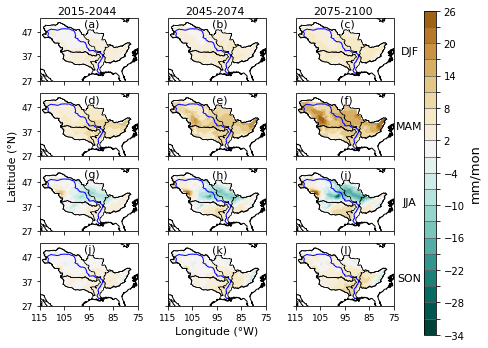

In [143]:

fraction_seasonMax = 2.8
nDiv_seasonMax = int(vmax_jjaTot_scenEraThree - vmin_jjaTot_scenEraThree + 1)


tickFontSize = 9
textFontSize = 11
legendFontSize = 10
titleFontSize = 11


cbarTickFontSize = 10
cbarTextFontSize = 13


linewidth = 0.7
#++++++++++++++++++++

# Plot for August
#   https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=vmin_jjaTot_scenEraThree, vmax=vmax_jjaTot_scenEraThree+0, midpoint=0)
levels = np.linspace(vmin_jjaTot_scenEraThree, vmax_jjaTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax)) # to draw 11 levels
boundaries=np.linspace(vmin_jjaTot_scenEraThree,vmax_jjaTot_scenEraThree+0, int(nDiv_seasonMax/fraction_seasonMax))

latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

latTicks = [27, 37, 47]
lonTicks = [-115, -105, -95, -85, -75]

yLimLow = 27
yLimHigh = 52.5

xLimLow = -115
xLimHigh = -75



fig = plt.figure(figsize=(11, 5), constrained_layout=True)
axs = [plt.subplot(4, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(12)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_djfTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)
                              
plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
ax1.set_xlim([xLimLow, xLimHigh])
ax1.set_ylim([yLimLow, yLimHigh])

ax1.set_yticks(latTicks) 
ax1.set_xticks(lonTicks) 

ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax1.set_xticklabels('', fontSize = tickFontSize)

ax1.set_title('(a)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
ax1.text(-108.0, 54, r'2015-2044', fontsize=titleFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_djfTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

p2 = ax2.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
#ax2.set_xlim([-115, -75])
#ax2.set_ylim([27, 52.5])
ax2.set_xlim([xLimLow, xLimHigh])
ax2.set_ylim([yLimLow, yLimHigh])

ax2.set_yticks(latTicks) 
ax2.set_yticklabels('', fontSize = tickFontSize)

ax2.set_xticks(lonTicks) 
ax2.set_xticklabels('', fontSize = tickFontSize)
ax2.set_title('(b)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
ax2.text(-108.0, 54, r'2045-2074', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_djfTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
#ax3.set_xlim([-115, -75])
#ax3.set_ylim([27, 52.5])
ax3.set_xlim([xLimLow, xLimHigh])
ax3.set_ylim([yLimLow, yLimHigh])

ax3.set_yticks(latTicks) 

ax3.set_yticklabels('', fontSize = tickFontSize)
ax3.set_xticks(lonTicks) 
ax3.set_xticklabels('', fontSize = tickFontSize)
ax3.set_title('(c)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
ax3.text(-108.0, 54, r'2075-2100', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,param_mamTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)
#ax4.set_xlim([-115, -75])
#ax4.set_ylim([27, 52.5])
ax4.set_xlim([xLimLow, xLimHigh])
ax4.set_ylim([yLimLow, yLimHigh])


ax4.set_yticks(latTicks) 
ax4.set_xticks(lonTicks) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax4.set_xticklabels('', fontSize = tickFontSize)
ax4.set_ylabel('Latitude (°N)', fontsize = titleFontSize, y=-0.15)

ax4.set_title('(d)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,param_mamTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

p5 = ax5.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
#ax5.set_xlim([-115, -75])
#ax5.set_ylim([27, 52.5])
ax5.set_xlim([xLimLow, xLimHigh])
ax5.set_ylim([yLimLow, yLimHigh])


ax5.set_yticks(latTicks) 
ax5.set_yticklabels('', fontSize = tickFontSize)

ax5.set_xticks(lonTicks) 
ax5.set_xticklabels('', fontSize = tickFontSize)
ax5.set_title('(e)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,param_mamTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
#ax6.set_xlim([-115, -75])
#ax6.set_ylim([27, 52.5])
ax6.set_xlim([xLimLow, xLimHigh])
ax6.set_ylim([yLimLow, yLimHigh])

ax6.set_yticks(latTicks) 

ax6.set_yticklabels('', fontSize = tickFontSize)

ax6.set_xticks(lonTicks) 
ax6.set_xticklabels('', fontSize = tickFontSize)

ax6.set_title('(f)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,param_jjaTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)
#ax7.set_xlim([-115, -75])
#ax7.set_ylim([27, 52.5])
ax7.set_xlim([xLimLow, xLimHigh])
ax7.set_ylim([yLimLow, yLimHigh])

ax7.set_yticks(latTicks) 
ax7.set_xticks(lonTicks) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax7.set_xticklabels('', fontSize = tickFontSize)
ax7.set_title('(g)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,param_jjaTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

p8 = ax8.get_position().get_points().flatten()

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
#ax8.set_xlim([-115, -75])
#ax8.set_ylim([27, 52.5])
ax8.set_xlim([xLimLow, xLimHigh])
ax8.set_ylim([yLimLow, yLimHigh])


ax8.set_yticks(latTicks) 

ax8.set_yticklabels('', fontSize = tickFontSize)
ax8.set_xticks(lonTicks) 
ax8.set_xticklabels('', fontSize = tickFontSize)
ax8.set_title('(h)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,param_jjaTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
#ax9.set_xlim([-115, -75])
#ax9.set_ylim([27, 52.5])
ax9.set_xlim([xLimLow, xLimHigh])
ax9.set_ylim([yLimLow, yLimHigh])

ax9.set_yticks(latTicks) 

ax9.set_yticklabels('', fontSize = tickFontSize)
ax9.set_xticks(lonTicks) 
ax9.set_xticklabels('', fontSize = tickFontSize)
ax9.set_title('(i)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,param_sonTot_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)
#ax10.set_xlim([-115, -75])
#ax10.set_ylim([27, 52.5])
ax10.set_xlim([xLimLow, xLimHigh])
ax10.set_ylim([yLimLow, yLimHigh])

ax10.set_yticks(latTicks) 
ax10.set_xticks(lonTicks) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax10.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax10.set_title('(j)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,param_sonTot_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.18, +0.02, (p11[2]-p11[0])*0.12, 0.9])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries, orientation = 'vertical') 
cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for label in cbar11.ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
    
cbar11.set_label("mm/mon", fontsize = cbarTextFontSize)


plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
#ax11.set_xlim([-115, -75])
#ax11.set_ylim([27, 52.5])
ax11.set_xlim([xLimLow, xLimHigh])
ax11.set_ylim([yLimLow, yLimHigh])

ax11.set_yticks(latTicks) 

ax11.set_yticklabels('', fontSize = tickFontSize)
ax11.set_xticks(lonTicks) 

ax11.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax11.set_xlabel('Longitude (°W)', fontsize = titleFontSize)
ax11.set_title('(k)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,param_sonTot_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels,norm=norm,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
#ax12.set_xlim([-115, -75])
#ax12.set_ylim([27, 52.5])
ax12.set_xlim([xLimLow, xLimHigh])
ax12.set_ylim([yLimLow, yLimHigh])

ax12.set_yticks(latTicks) 

ax12.set_yticklabels('', fontSize = tickFontSize)
ax12.set_xticks(lonTicks) 

ax12.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax12.set_title('(l)', x = 0.45, y=1.08, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.text(-145, 18, 'DJF', fontsize=titleFontSize)
plt.text(-169, 4, 'MAM', fontsize=titleFontSize)
plt.text(-137, -10, 'JJA', fontsize=titleFontSize)
plt.text(-160, -24, 'SON', fontsize=titleFontSize)

plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.2)
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\et\seasonal\tcfEtSeasMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\et\seasonal\tcfEtSeasMap.png', dpi=600)  



plt.show()
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [144]:
STOP here ===============

SyntaxError: invalid syntax (<ipython-input-144-5b483f7718ca>, line 1)